In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: EDA en Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama _Digital Currency_ y puede leer su descripción en la siguiente liga

https://www.openml.org/d/43748

In [5]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(43748, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [6]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'None'
Todas las características son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']
Las características categóricas son []
Las características numéricas son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']


In [7]:
# Impresión de las características
features

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,29.60,44.27,52.87,95.67,49.64,122.59,0,0,0,0
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,25.22,37.49,45.21,94.42,51.67,105.90,0,0,0,0
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,24.46,35.84,42.32,95.40,49.26,101.84,0,0,0,0
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,23.42,34.53,41.37,96.39,48.06,98.17,0,0,0,0
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,38.29,56.55,68.59,93.70,57.11,151.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Mandalay,Jefferson Center,10/27/2020 0:00,2020,October,Rainy Season,19.50,31.46,37.68,93.33,55.19,91.71,1426,46200,27,1122
5118,Mandalay,Jefferson Center,10/28/2020 0:00,2020,October,Rainy Season,17.36,27.30,31.57,94.07,54.33,82.97,1466,47666,25,1147
5119,Mandalay,Jefferson Center,10/29/2020 0:00,2020,October,Rainy Season,15.30,24.34,27.73,93.45,57.17,76.74,1406,49072,25,1172
5120,Mandalay,Jefferson Center,10/30/2020 0:00,2020,October,Rainy Season,10.18,16.20,18.90,92.64,52.21,59.62,1331,50403,27,1199


## Asignación 1 &#x1F625;

Plantee 2 preguntas que le parezcan interesantes a resolver con este dataset.

Puesto que el dataset anterior fue creado para analizar la contaminación en el aire de Birmania desencadenada por su industrialización que conllevó el incremento de fábricas y carros, es pertinente preguntarnos acerca del cómo se comporta la contaminación en algunas ciudades de este país. Las siguientes preguntas son las que pretendo resolver:

**¿Cómo se comporta por ciudad y a lo largo del tiempo la correlación del AQI, temperatura y % de humedad con los nuevos casos de enfermos y muertes por afecciones respiratorias?**

**¿La temporada del año es un factor importante en la cantidad de enfermos y muertes?**

Nota: AQI = Air Quality Index, es una métrica que se realiza con base en la medición de partículas (PM 10 y PM 2.5), monóxido de carbono (CO), ozono (O3), dióxido de nitrógeno (NO2), dióxido de azufre (SO2), amoníaco (NH3) y plomo (Pb). En este sentido, existe una escala de AQI donde se caracteriza al aire como aparece a continuación:

- 0-50:  El rango muestra que la calidad del aire es buena y no representa una amenaza para la salud.

- 51-100: Este rango es moderado y la calidad es aceptable. Algunas personas pueden experimentar molestias.

- 101-150: La calidad del aire en este rango no es saludable para grupos sensibles. Experimentan molestias respiratorias.

- 151-200: El rango muestra una calidad del aire poco saludable y las personas comienzan a experimentar efectos como dificultad para respirar.

- 201-300: La calidad del aire es muy poco saludable en este rango y se pueden emitir advertencias sanitarias para condiciones de emergencia. Es probable que todas las personas se vean afectadas.

- 301-500: Esta es la categoría peligrosa de la calidad del aire y todos pueden experimentar graves impactos en la salud, como molestias respiratorias, asfixia, irritación de las vías respiratorias, etc.

## Asignación 2 &#x1F921;

Apoyado de las técnicas vistas en clase, realice un análisis exploratorio de datos (EDA) que le permita responder de manera guiada las preguntas planteadas anteriormente. Debe apoyarse de visualizaciones y métricas para respaldar sus respuestas.

## Exploración y transformaciones preliminares

Checamos el total de registros.

In [8]:
len(features)

5122

Verificamos si hay duplicados.

In [9]:
len(features.drop_duplicates())

5122

Obtenemos las ciudades con sus respectivos centros de medición.

In [10]:
features[['City', 'Center']].groupby(['City', 'Center']).size().to_frame(name = 'Count').reset_index()

,City,Center,Count
0,Mandalay,19th Street,378
1,Mandalay,Jefferson Center,378
2,Yangon,7 Miles Mayangone,378
3,Yangon,Ahlone Myanmar Center for Responsible Business,378
4,Yangon,American Center,378
5,Yangon,Beca Myanmar (Outside),378
6,Yangon,GEMS Condo,378
7,Yangon,Pun Hlaing Dulwich College,378
8,Yangon,Star City Dulwich College,378
9,Yangon,Thin Gan Gyun Yangon International School (Out...,378


Visto lo anterior existen dos ciudades Mandalay y Yangon, las cuales tienen 2 y 12 centros de medición respectivamente, donde además la distribución de los registros por estación es prácticamente idéntica salvo en la estación WWF-Myanmar.

Buscamos valores nulos.

In [11]:
def check_nans(df):
    for c in list(df.columns.values):
        print(c + ' NaNs -> ' + str(df[c].isnull().sum()))

In [12]:
check_nans(features)

City NaNs -> 0
Center NaNs -> 0
Date NaNs -> 0
Year NaNs -> 0
Month NaNs -> 0
Season NaNs -> 0
PM1_0 NaNs -> 0
PM2_5 NaNs -> 0
PM10 NaNs -> 0
Temperature_F NaNs -> 0
Humidity_% NaNs -> 0
AQI NaNs -> 0
New_cases NaNs -> 0
Cumulative_cases NaNs -> 0
New_deaths NaNs -> 0
Cumulative_deaths NaNs -> 0


Normalizamos los datos.

In [13]:
import copy

In [14]:
def normalize_cols(cols):
    return (cols - cols.min()) / (cols.max() - cols.min())
    #return (cols - cols.mean()) / cols.std()

In [15]:
def normalize_data(data, exceptions = None):
    data_columns = data.columns
    for col_name in data_columns:
        if col_name not in exceptions:
            new_value = normalize_cols(data[col_name])
            data[col_name] = new_value
    return data

In [16]:
normalized_df = normalize_data(copy.deepcopy(features), ['City', 'Center', 'Date', 'Year', 'Month', 'Season'])
normalized_df

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,0.279800,0.233172,0.250225,0.726774,0.522315,0.510770,0.000000,0.000000,0.000000,0.000000
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,0.238397,0.197461,0.213971,0.690710,0.557706,0.441232,0.000000,0.000000,0.000000,0.000000
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,0.231213,0.188771,0.200293,0.718984,0.515690,0.424316,0.000000,0.000000,0.000000,0.000000
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,0.221382,0.181871,0.195797,0.747548,0.494770,0.409025,0.000000,0.000000,0.000000,0.000000
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,0.361943,0.297851,0.324625,0.669937,0.652545,0.631390,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Mandalay,Jefferson Center,10/27/2020 0:00,2020,October,Rainy Season,0.184327,0.165701,0.178333,0.659261,0.619073,0.382109,0.660797,0.897157,0.562500,0.920427
5118,Mandalay,Jefferson Center,10/28/2020 0:00,2020,October,Rainy Season,0.164099,0.143790,0.149415,0.680612,0.604079,0.345694,0.679333,0.925625,0.520833,0.940935
5119,Mandalay,Jefferson Center,10/29/2020 0:00,2020,October,Rainy Season,0.144626,0.128200,0.131241,0.662724,0.653591,0.319737,0.651529,0.952928,0.520833,0.961444
5120,Mandalay,Jefferson Center,10/30/2020 0:00,2020,October,Rainy Season,0.096228,0.085326,0.089451,0.639354,0.567120,0.248406,0.616775,0.978775,0.562500,0.983593


In [17]:
features

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,29.60,44.27,52.87,95.67,49.64,122.59,0,0,0,0
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,25.22,37.49,45.21,94.42,51.67,105.90,0,0,0,0
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,24.46,35.84,42.32,95.40,49.26,101.84,0,0,0,0
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,23.42,34.53,41.37,96.39,48.06,98.17,0,0,0,0
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,38.29,56.55,68.59,93.70,57.11,151.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Mandalay,Jefferson Center,10/27/2020 0:00,2020,October,Rainy Season,19.50,31.46,37.68,93.33,55.19,91.71,1426,46200,27,1122
5118,Mandalay,Jefferson Center,10/28/2020 0:00,2020,October,Rainy Season,17.36,27.30,31.57,94.07,54.33,82.97,1466,47666,25,1147
5119,Mandalay,Jefferson Center,10/29/2020 0:00,2020,October,Rainy Season,15.30,24.34,27.73,93.45,57.17,76.74,1406,49072,25,1172
5120,Mandalay,Jefferson Center,10/30/2020 0:00,2020,October,Rainy Season,10.18,16.20,18.90,92.64,52.21,59.62,1331,50403,27,1199


## Histogramas y series de tiempo para columnas numéricas (datos sin agrupar)

In [18]:
def plot_hist_ts(date, column, extra_desc = ''):
    skewness = calc_skewness(column)
    __fig__, __axs__ = plt.subplots(1, 2, figsize=(30, 5))
    __fig__.subplots_adjust(hspace=0.1, wspace=0.3)
    __axs__[0].set(title="{} {} (mean = {}, std = {}, skewness = {})".format(extra_desc, column.name, round(column.mean(), 2), round(column.std(), 2), round(skewness, 2)))
    _ = sns.histplot(x=column, ax=__axs__[0])
    __axs__[1].set(title=extra_desc + column.name)
    _ = sns.lineplot(x=date, y=column, ax=__axs__[1], color = 'navy')
    plt.plot()

In [19]:
def calc_skewness(x):
    return (((x - x.mean()) / (x.var() ** (1/2))) ** 3).mean()

Para entender un poco mejor los datos, graficamos histogramas y series de tiempo considerando a todos los datos sin agrupar.

In [20]:
numerical_cols = ['PM1_0', 'PM2_5', 'PM10', 'Temperature_F', 'Humidity_%', 'AQI', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']

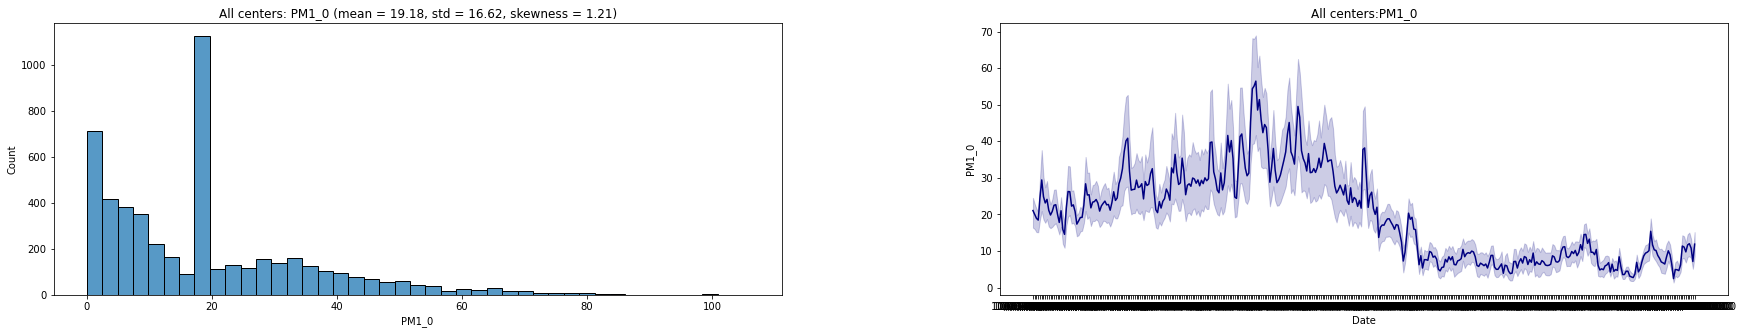

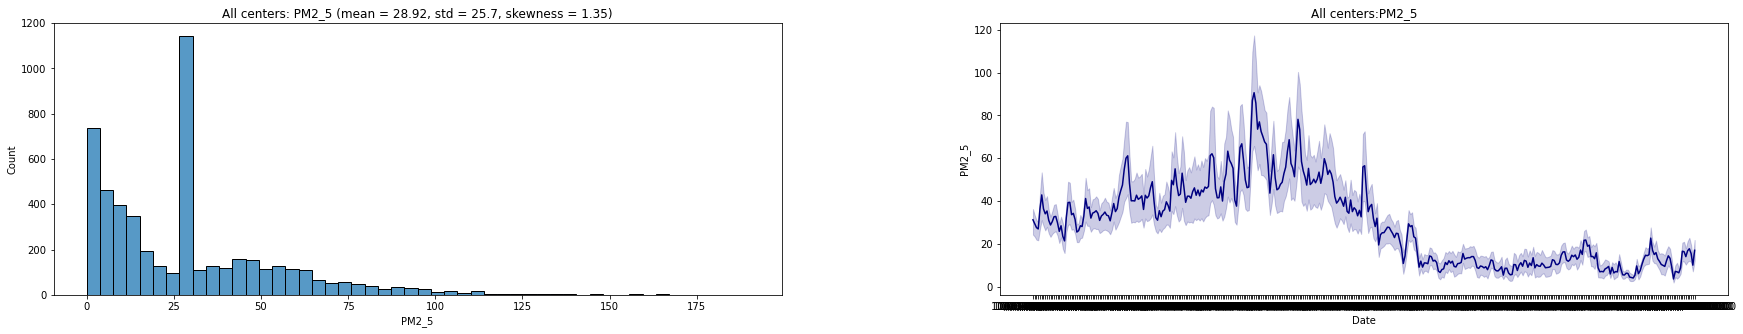

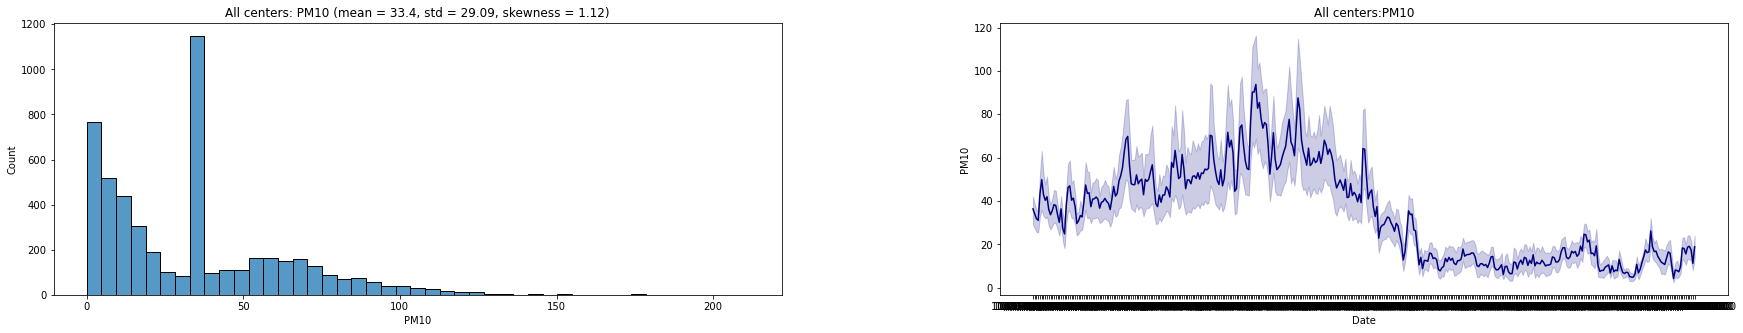

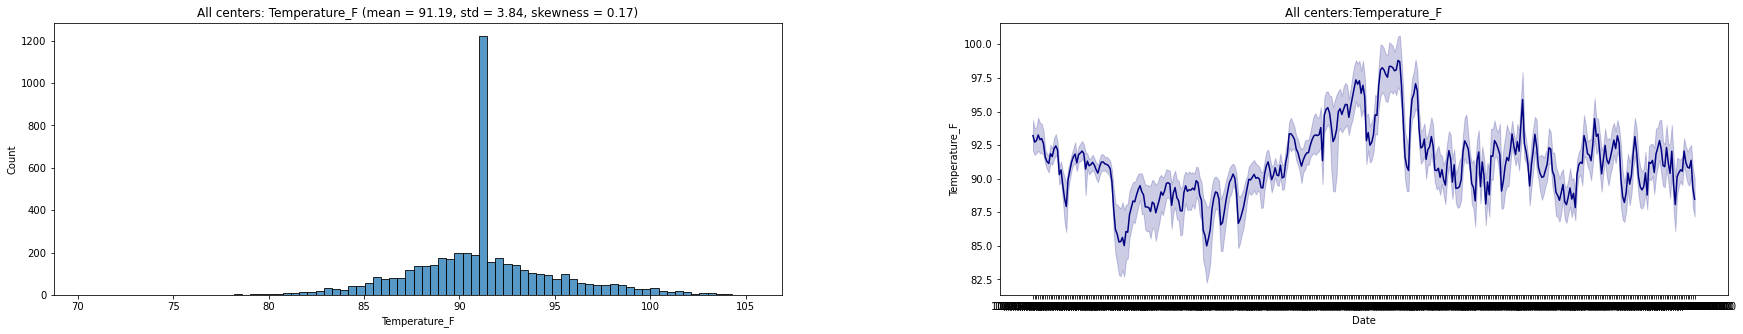

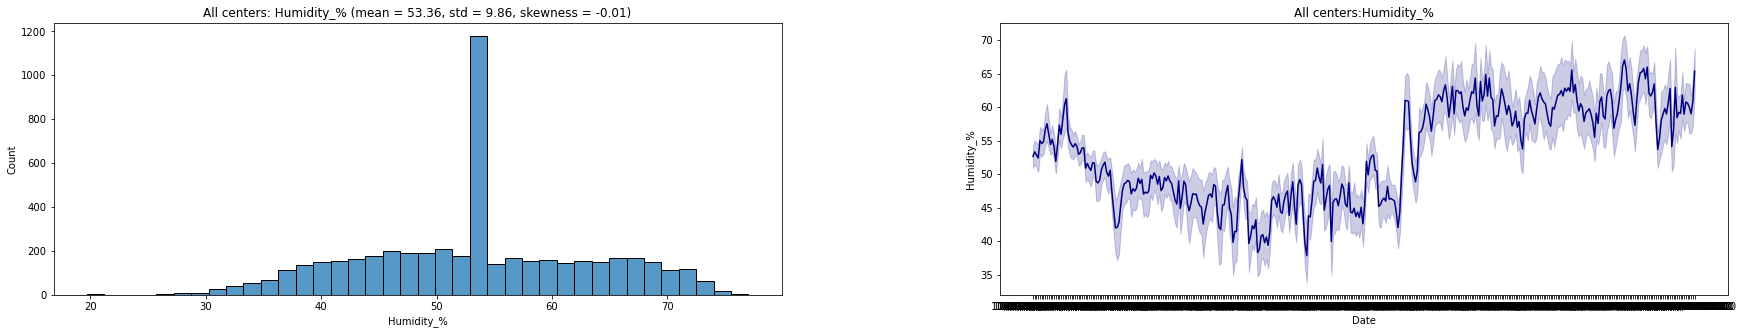

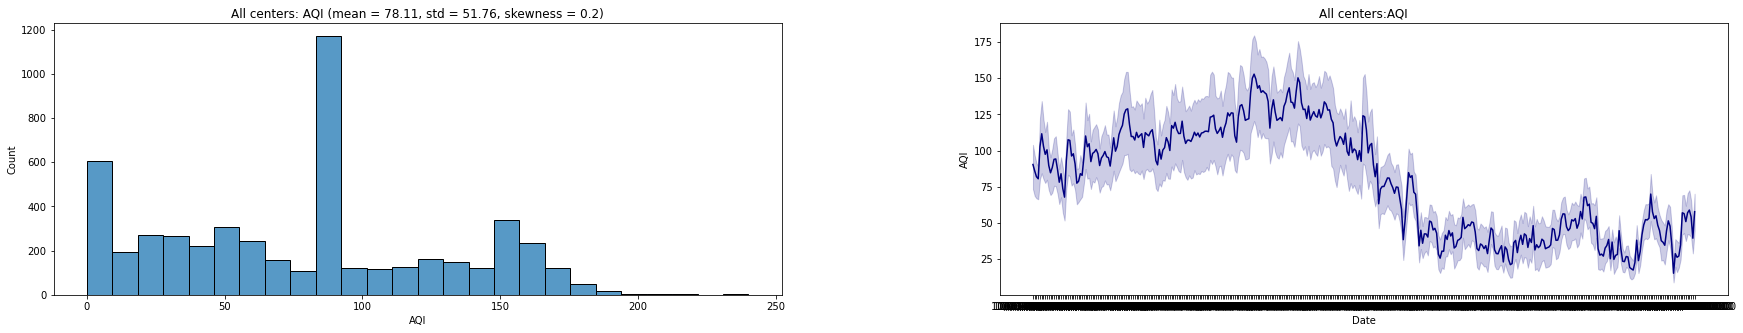

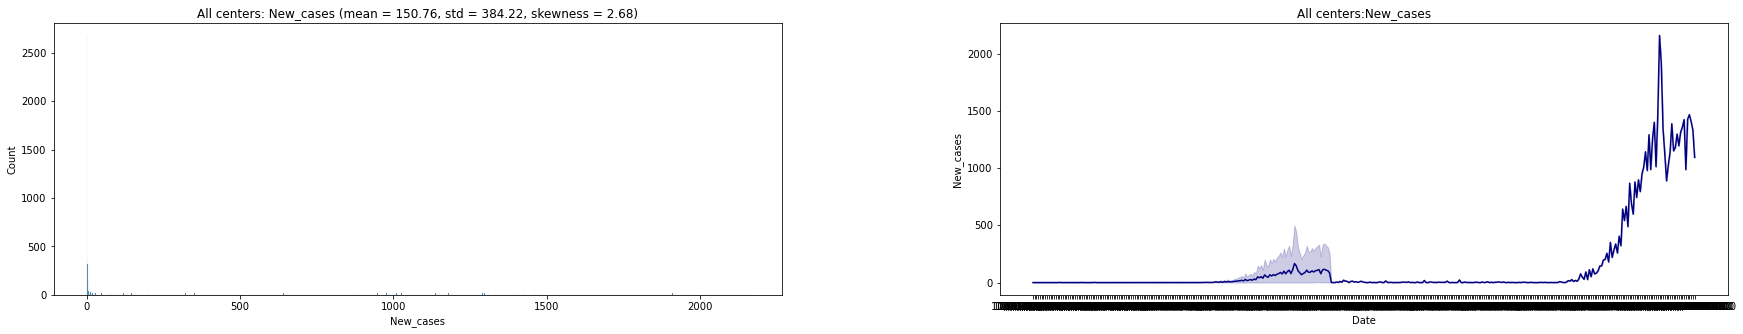

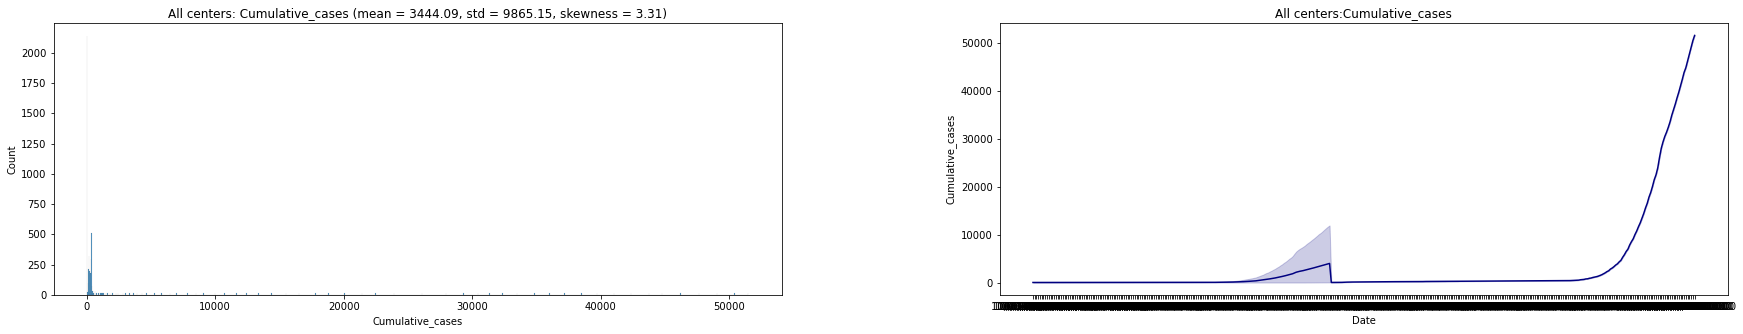

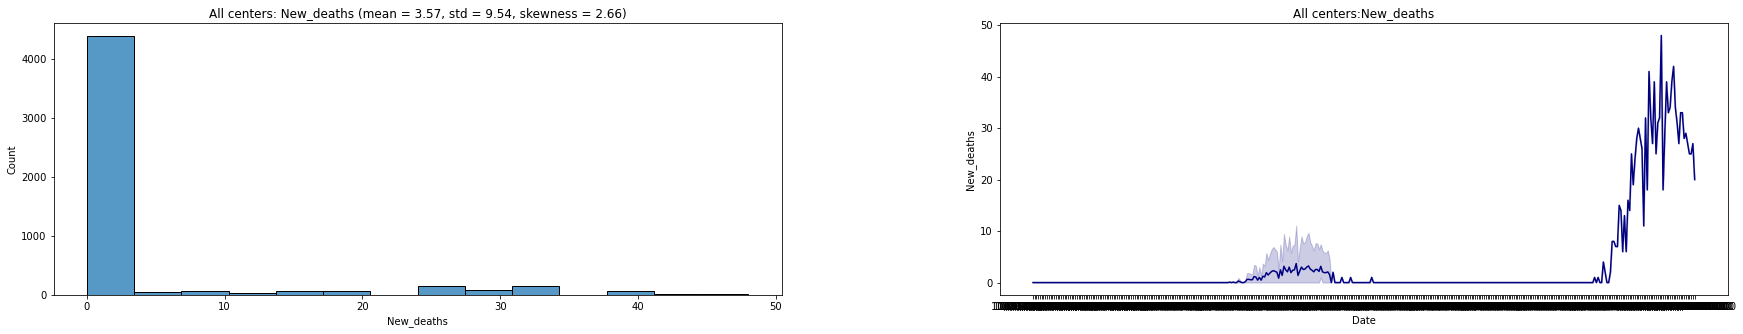

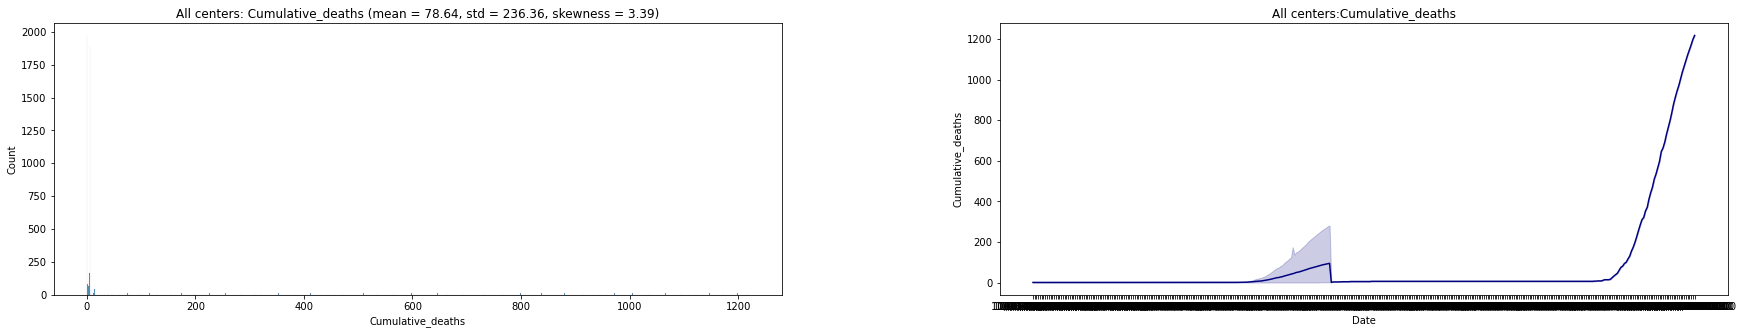

In [21]:
for col in numerical_cols:
    plot_hist_ts(features.Date, features[col], 'All centers:')

Observamos que existen outliers en las columnas de nuevos casos de enfermos y muertes, los cuales se deben a que repentinamente empezaron a existir casos de personas que se enfermaron o murieron por afecciones respiratorias. Cabe agregar que en las series de tiempo existe cierta sombra en las gráficas debido a que existen registros por cada centro de medición en un mismo día.

Por otro lado, al considerar el alza en el número de enfermos y muertos en los últimos registros del 2020, los índices de contaminación se mantienen relativamente bajos respecto a meses pasados, mientras que la humedad se ve en aumento durante dichos meses. Además el comportamiento del AQI respecto al de contaminantes como PM1, PM2.5 y PM10 es similar, y por ello para resumir a dichos contaminantes solamente utilizaremos el AQI como métrica de contaminación.

## ¿Cómo se comporta por ciudad y a lo largo del tiempo la correlación del AQI, temperatura y % de humedad con los nuevos casos de enfermos y muertes por afecciones respiratorias?

## Series de tiempo

In [22]:
def plot_ts(df, columns, colors, extra_desc = ''):
    __fig__, __axs__ = plt.subplots(1, figsize=(15, 5))
    __fig__.subplots_adjust(hspace=0.1, wspace=0.3)
    __axs__.set(title = extra_desc + ', '.join(columns))
    for col in columns:
        _ = sns.lineplot(x=df.Date, y=df[col], ax=__axs__, color = colors[col], label = col)
    plt.plot()

### Datos agrupados por ciudad (media)

Para responder esta pregunta, agrupamos los registros por ciudad y fecha y les aplicamos la media a las columnas numéricas. Además agregamos la columna de la temporada porque va a ser un atributo que ocuparemos en la segunda pregunta.

In [23]:
df_city_grouped_mean = normalized_df.groupby(['City', 'Date', 'Season'], as_index=False)[['PM1_0', 'PM2_5', 'PM10', 'Temperature_F', 'Humidity_%', 'AQI', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].mean()
df_city_grouped_mean

,City,Date,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Mandalay,1/1/2020 0:00,Cool Season,0.181303,0.152323,0.158077,0.597519,0.587169,0.359860,0.000000,0.000000,0.000000,0.000000
1,Mandalay,1/10/2020 0:00,Cool Season,0.181303,0.152323,0.158077,0.597519,0.587169,0.359860,0.000000,0.000000,0.000000,0.000000
2,Mandalay,1/11/2020 0:00,Cool Season,0.181303,0.152323,0.158077,0.597519,0.587169,0.359860,0.000000,0.000000,0.000000,0.000000
3,Mandalay,1/12/2020 0:00,Cool Season,0.181303,0.152323,0.158077,0.597519,0.587169,0.359860,0.000000,0.000000,0.000000,0.000000
4,Mandalay,1/13/2020 0:00,Cool Season,0.181303,0.152323,0.158077,0.597519,0.587169,0.359860,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,Yangon,9/5/2020 0:00,Rainy Season,0.087800,0.074515,0.083112,0.629232,0.715147,0.208391,0.038462,0.023613,0.000000,0.005742
752,Yangon,9/6/2020 0:00,Rainy Season,0.052588,0.042970,0.043720,0.643778,0.680294,0.117933,0.047729,0.025614,0.020833,0.006563
753,Yangon,9/7/2020 0:00,Rainy Season,0.036566,0.030742,0.027892,0.590162,0.747022,0.095781,0.067192,0.028429,0.000000,0.006563
754,Yangon,9/8/2020 0:00,Rainy Season,0.037795,0.029096,0.028799,0.544792,0.749492,0.094677,0.067655,0.031265,0.000000,0.006563


Separamos los datos agrupados en dataframes para los registros de las 2 ciudades.

In [24]:
cities = list(set(df_city_grouped_mean.City))
cities

['Yangon', 'Mandalay']

In [25]:
city_data = list()
for i in range(len(cities)):
    city_data.append(df_city_grouped_mean[df_ city_grouped_mean.City == cities[i]].sort_values(by = 'Date'))

Graficamos series de tiempo donde se muestran las columnas relacionadas con condiciones atmosféricas y por otro lado las vinculadas con los nuevos casos de enfermos y muertes por afecciones respiratorias. La razón de ocupar los nuevos casos en lugar de los acumulados, es porque así podemos identificar más fácilmente los cambios de estas variables en el tiempo.

In [26]:
sel_numerical_cols = ['AQI', 'Temperature_F', 'Humidity_%']
sel_effects_cols = ['New_cases', 'New_deaths']

In [27]:
colors_numerical_cols = {'AQI': 'Navy', 'Temperature_F': 'Green', 'Humidity_%': 'Orange'}
colors_effects_cols = {'New_cases': 'Black', 'New_deaths': 'Red'}

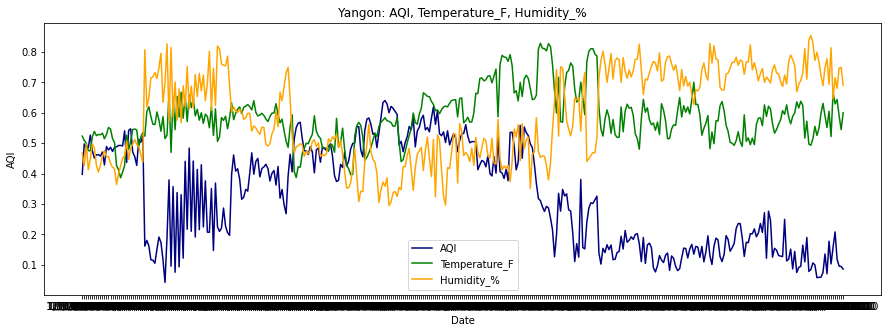

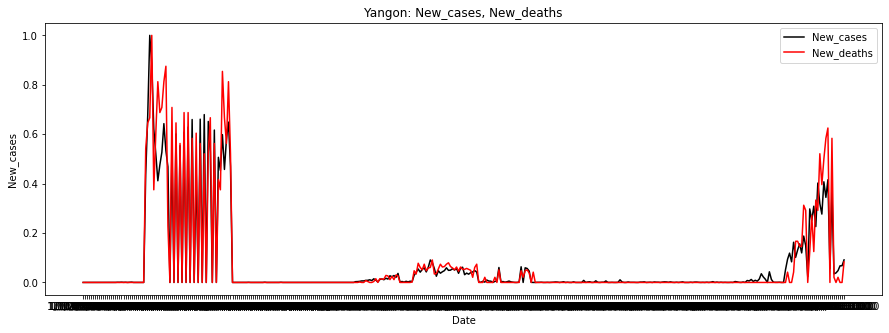

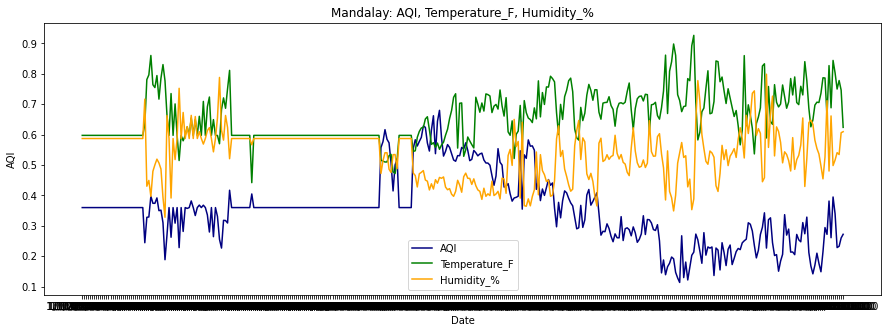

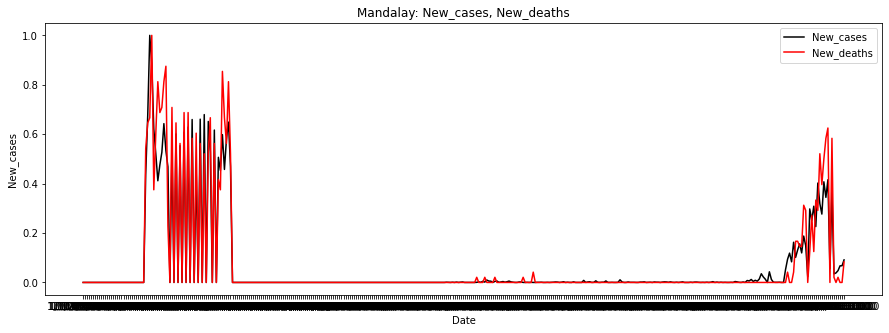

In [28]:
for i in range(len(cities)):
    plot_ts(city_data[i], sel_numerical_cols, colors_numerical_cols, cities[i] + ': ')
    plot_ts(city_data[i], sel_effects_cols, colors_effects_cols, cities[i] + ': ')

Observemos que para ambas ciudades, los casos de enfermos y muertes se comportan de forma parecida a lo largo del tiempo. No obstante, algo llamativo es que a pesar de los múltiples e inestables picos en las series de tiempo de AQI, temperatura y porcentaje de humedad, parece que estos no siempre influyen directamente en el incremento de nuevos enfermos y muertes, ya que incluso hay un periodo algo extenso donde dichas series de tiempo se mantienen estables y con niveles cercanos al cero.

## Correlogramas de casos y muertes por enfermedades respiratorias con AQI, temperatura y % de humedad

In [29]:
def crossvariance(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la autocovarianza.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para loscuales debe calcularse la covarianza.
            
    Salidas:
    - Si lags es un número debe regresar un valor de covarianza, si es una lista, 
        debe ser una lista de covarianzas.
    """
    
    # CÓDIGO AQUI
    
    mean_ts1 = time_series_1.mean()
    mean_ts2 = time_series_2.mean()
    if isinstance(lags, int):
        num_times = len(time_series_1)
        prods = np.array(num_times - lags)
        ts1_lag = np.array(time_series_1)[lags:]
        ts2_lag = np.array(time_series_2)[:num_times - lags]
        prods = (ts1_lag - mean_ts1) * (ts2_lag - mean_ts2)
        cvar = sum(prods) / len(prods)
        #print(cvar)
        
        return cvar
    
    else:
        cvars = list()
        for lag in lags:
            num_times = len(time_series_1)
            prods = np.array(num_times - lag)
            ts1_lag = np.array(time_series_1)[lag:]
            ts2_lag = np.array(time_series_2)[:num_times - lag]
            prods = (ts1_lag - mean_ts1) * (ts2_lag - mean_ts2)
            cvar = sum(prods) / len(prods)
            cvars.append(cvar)
        #print(cvars)
        
        return cvars
    
    return None

In [30]:
def crosscorrelation(
    time_series_1: pd.Series,
    time_series_2: pd.Series,
    lags: Union[List[int], int]
) -> Union[List[float], float]:
    """
    Descripción:
    Esta funcion es la generalización de la correlación. Usted debe definirla y documentarla como en
    el caso de la función crosscovariance.
    
    Entradas:
    - time_series_1: Primera serie de tiempo a utilizar para el cálculo.
    - time_series_2: Segunda serie de tiempo a utilizar para el cálculo.
    - lags: Puede ser uno o varios lags para los cuales debe calcularse la correlación.
            
    Salidas:
    - Si lags es un número debe regresar un valor de correlación, si es una lista, 
        debe ser una lista de correlaciones.
    """
    
    # CÓDIGO AQUI
    
    if isinstance(lags, int):
        cvar12 = crossvariance(time_series_1, time_series_2, lags)
        cvar11 = crossvariance(time_series_1, time_series_1, 0)
        cvar22 = crossvariance(time_series_2, time_series_2, 0)
        c_corr = cvar12 / ((cvar11 * cvar22) ** (1/2))
        
        return c_corr
    
    else:
        c_corrs = list()
        for lag in lags:
            var12 = crossvariance(time_series_1, time_series_2, lag)
            cvar11 = crossvariance(time_series_1, time_series_1, 0)
            cvar22 = crossvariance(time_series_2, time_series_2, 0)
            c_corr = cvar12 / ((cvar11 * cvar22) ** (1/2))
            c_corrs.append(c_corr)
        
        return c_corrs
    
    return None

In [31]:
def plot_correlogram_2_cities(col11, col21, col12, col22, extra_desc_1 = '', extra_desc_2 = '', H1 = 100, H2 = 100):
    # For city 1
    lags1 = [l for l in range(H1)]
    c_corrs1 = np.array([crosscorrelation(col11, col21, l) for l in lags1])
    std_1 = (np.var(c_corrs1)) ** (1 / 2)
    std_2_1 = 2 * std_1
    std_2_5_1 = 2.5 * std_1
    std_3_1 = 3 * std_1
    
    # For city 2
    lags2 = [l for l in range(H2)]
    c_corrs2 = np.array([crosscorrelation(col12, col22, l) for l in lags2])
    std_2 = (np.var(c_corrs2)) ** (1 / 2)
    std_2_2 = 2 * std_2
    std_2_5_2 = 2.5 * std_2
    std_3_2 = 3 * std_2
    
    __fig__, __axs__ = plt.subplots(1, 2, figsize = (30, 5))
    __axs__[0].set_xticklabels(__axs__[0].get_xticklabels(), rotation = 90, ha = "right")
    __axs__[1].set_xticklabels(__axs__[1].get_xticklabels(), rotation = 90, ha = "right")
    
    __axs__[0].set(title="{} Correlograma {} vs {} (std = {})".format(extra_desc_1, col11.name, col21.name, round(std_1, 2)))
    __axs__[1].set(title="{} Correlograma {} vs {} (std = {})".format(extra_desc_2, col12.name, col22.name, round(std_2, 2)))
    
    ax1 = sns.barplot(x=lags1, y=c_corrs1, palette="mako", ax=__axs__[0])
    ax1.axhline(y=std_2_1, color='#9dd017', ls='--', lw=1.5, label = '2x std')
    ax1.axhline(y=std_2_5_1, color='#2fff3c', ls='--', lw=1.5, label = '2.5x std')
    ax1.axhline(y=std_3_1, color='#62e2ff', ls='--', lw=1.5, label = '3x std')
    ax1.axhline(y=-std_2_1, color='#9dd017', ls='--', lw=1.5, label = '-2x std')
    ax1.axhline(y=-std_2_5_1, color='#2fff3c', ls='--', lw=1.5, label = '-2.5x std')
    ax1.axhline(y=-std_3_1, color='#62e2ff', ls='--', lw=1.5, label = '-3x std')
    __axs__[0].legend(title='Std criteria', title_fontsize = 10)  
    
    plt.setp(__axs__[0], xticks=np.arange(min(lags1), max(lags1) + 1, 10.0), xticklabels=np.arange(min(lags1), max(lags1) + 1, 10.0))
    
    
    ax2 = sns.barplot(x=lags2, y=c_corrs2, palette="mako", ax=__axs__[1])
    ax2.axhline(y=std_2_2, color='#9dd017', ls='--', lw=1.5, label = '2x std')
    ax2.axhline(y=std_2_5_2, color='#2fff3c', ls='--', lw=1.5, label = '2.5x std')
    ax2.axhline(y=std_3_2, color='#62e2ff', ls='--', lw=1.5, label = '3x std')
    ax2.axhline(y=-std_2_2, color='#9dd017', ls='--', lw=1.5, label = '-2x std')
    ax2.axhline(y=-std_2_5_2, color='#2fff3c', ls='--', lw=1.5, label = '-2.5x std')
    ax2.axhline(y=-std_3_2, color='#62e2ff', ls='--', lw=1.5, label = '-3x std')
    __axs__[1].legend(title='Std criteria', title_fontsize = 10)
    
    plt.setp(__axs__[1], xticks=np.arange(min(lags2), max(lags2) + 1, 10.0), xticklabels=np.arange(min(lags2), max(lags2) + 1, 10.0))

### Datos agrupados por ciudad (media)

Graficamos para cada ciudad los correlogramas entre los nuevos casos de enfermos y muertes por afecciones respiratorias, con respecto a las variables de AQI, temperatura y % de humedad.

In [32]:
sel_numerical_cols = ['AQI', 'Temperature_F', 'Humidity_%']
sel_effects_cols = ['New_cases', 'New_deaths']

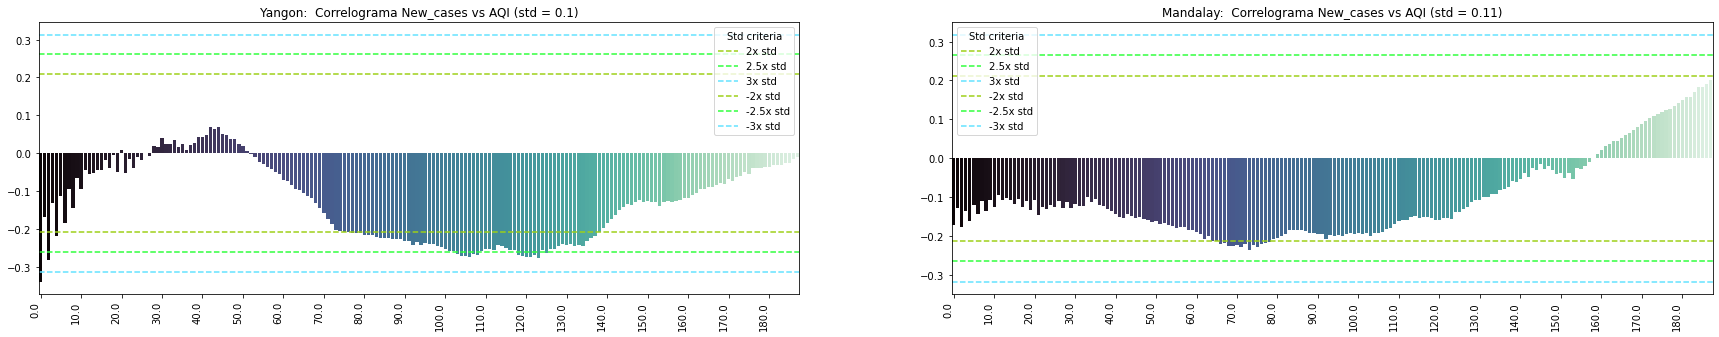

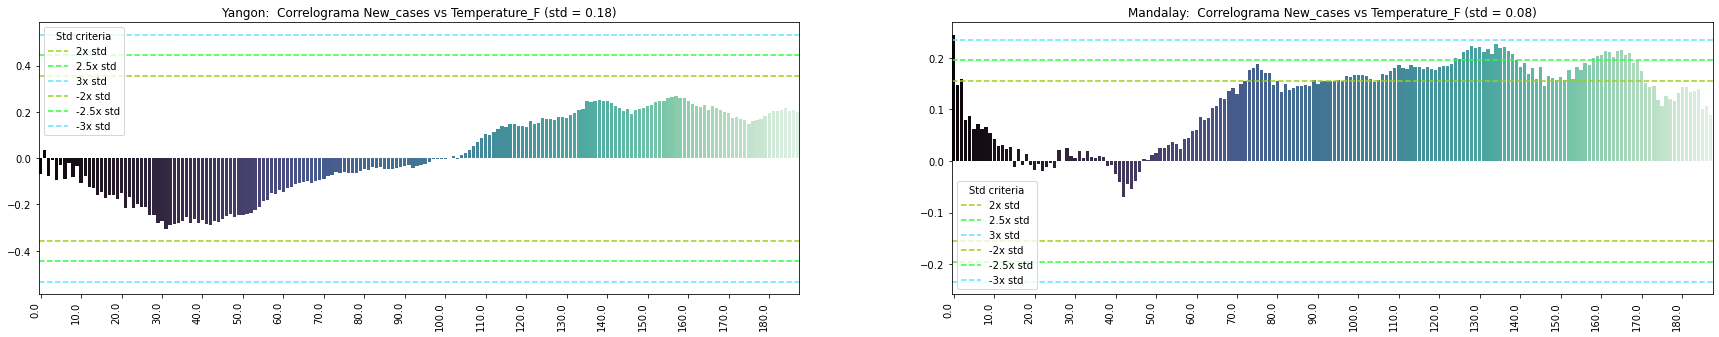

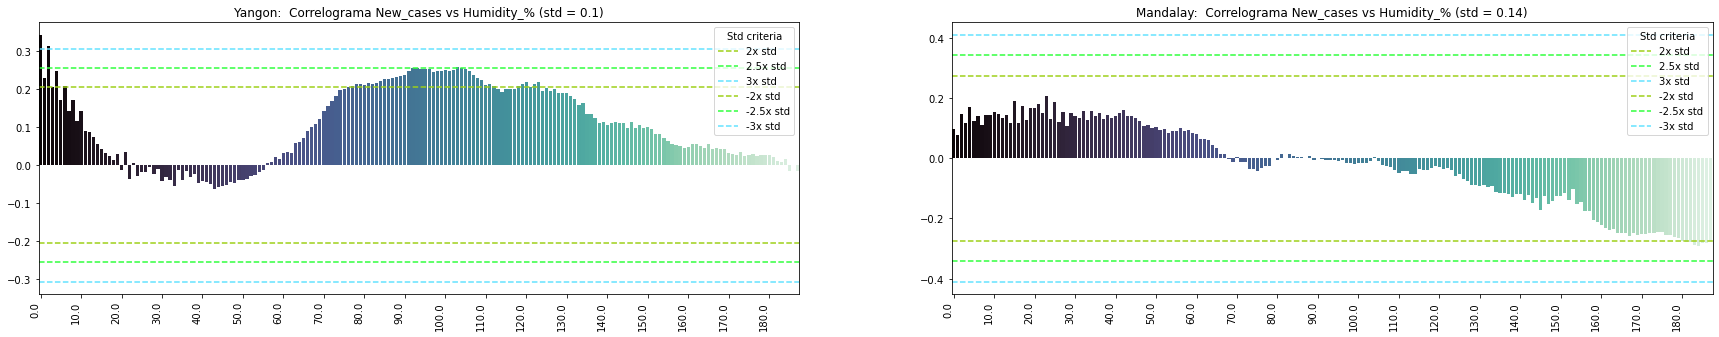

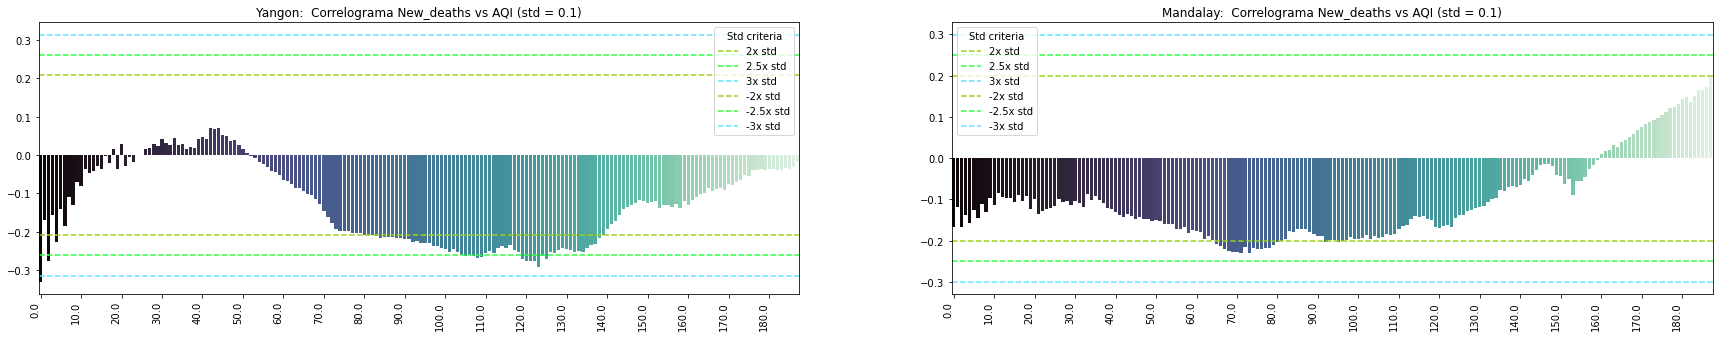

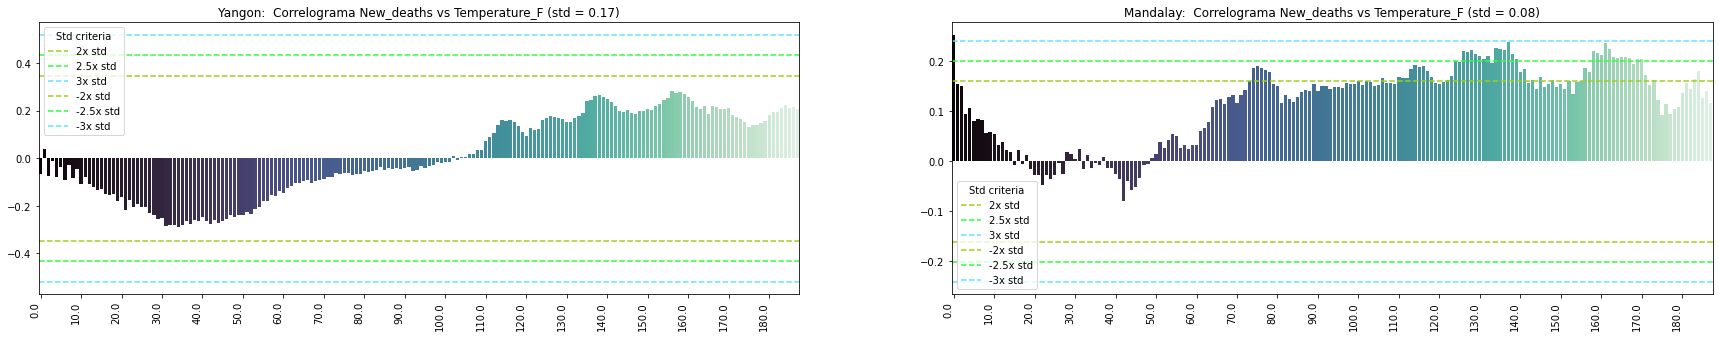

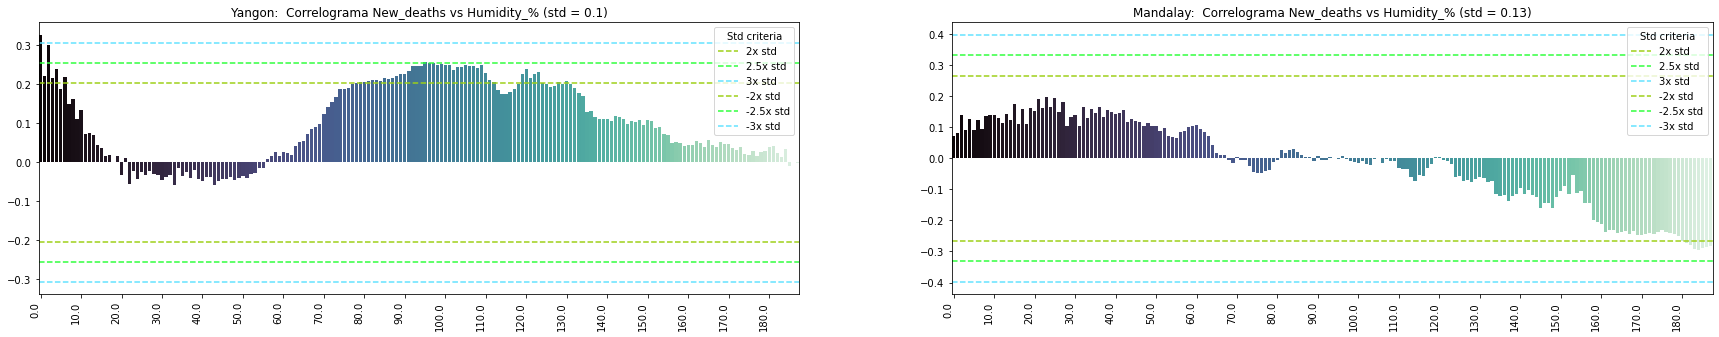

In [33]:
H1 = int(len(city_data[0]) / 2) - 1
H2 = int(len(city_data[1]) / 2) - 1
for col1 in sel_effects_cols:
    for col2 in sel_numerical_cols:
        plot_correlogram_2_cities(city_data[0][col1], city_data[0][col2], city_data[1][col1], city_data[1][col2], cities[0] + ': ', cities[1] + ': ', H1, H2)

### Hallazgos y respuesta a la pregunta:

Observamos que la correlación tanto de los nuevos casos de enfermos como de los muertos (con respecto a cualquier variable medioambiental seleccionada) se comporta de forma prácticamente idéntica a lo largo del tiempo. Por lo que los correlogramas de los nuevos casos de enfermos son análogos al de los muertos.

Así que haciendo énfasis en dichos correlogramas tenemos lo siguiente:

| | Yangon | Mandalay |
|:---:|:---:|:---:|
| **AQI** | Correlación negativa en la mayoría del tiempo | Correlación negativa hasta aprox 160 días de retraso, después comienza a ser positiva  |
| **Temperatura** | Correlación negativa hasta aprox. 100 días de retraso, después de ese periodo se vuelve positiva | Correlación positiva en la mayoría del tiempo |
| **% Humedad** | Correlación positiva en la mayoría del tiempo | Correlación generalmente positiva hasta aprox. 80 días de retraso, luego pasa a ser negativa |

Por lo que considerando los resultados anteriores, tenemos que para la ciudad de Yangon la correlación de los nuevos casos de enfermos y muertos es directamente proporcional a la Humedad (si una crece la otra también), mientras que en Mandalay existe una mayor tendencia a que tal correlacción es directamente proporcional con la Temperatura. Estos son resultados importantes, ya que contradice la intuición de que los contaminantes presentarían una mayor y positiva dependencia lineal con los casos de enfermos y muertos, respecto a otras variables medioambientales.

## ¿La temporada del año es un factor importante en la cantidad de enfermos y muertes?

## Gráficos de barras y series de tiempo para columnas numéricas segmentadas por temporada de año

Para responder esta pregunta procedemos a graficar por cada ciudad, las series de tiempo de AQI, temperatura, porcentaje de humedad, nuevos casos de enfermos y muertes, pero con el detalle de colorear la serie de tiempo dependiendo de la temporada. Asimismo, realizamos un gráfico de barras considerando la media de dichas variables (ya normalizadas) y agrupándolas por temporada. Si bien, la normalización provoca que no se obtenga la media real de dichas variables, sino más bien la media post-normalización, hay que tener en cuenta que las proporciones se mantienen y nos permitirán verificar en qué temporadas del año las variables poseen medias más altas.

In [34]:
list(set(features.Season))

['Cool Season', 'Hot Season', 'Rainy Season']

In [35]:
colors_season_cols = {'Rainy Season': 'Blue', 'Hot Season': 'Brown', 'Cool Season': 'Cyan'}

In [36]:
def plot_hist_ts_season(df, column, class_, colors, extra_desc = ''):
    skewness = calc_skewness(df[column])
    __fig__, __axs__ = plt.subplots(1, 2, figsize=(30, 5))
    __fig__.subplots_adjust(hspace=0.1, wspace=0.3)
    __axs__[0].set(title="{} {} mean by season".format(extra_desc, column))
    
    statistics = (df.groupby(class_)[column].describe()).sort_values(by = ['mean'], ascending = False)
    df_stats = statistics.reset_index()
    seasons = list(set(df_stats[class_]))
    _ = sns.barplot(data = df_stats, x = class_, y = 'mean', ax = __axs__[0], hue = class_, palette = colors)
    
    __axs__[1].set(title=extra_desc + column + ' time serie divided by season')
    
    _ = sns.lineplot(x = df.Date, y = df[column], ax = __axs__[1], color = 'Black')
    
    for s in seasons:
        df_aux = df[df[class_] == s].sort_values(by = 'Date')
        _ = sns.lineplot(data = df_aux, x = 'Date', y = column, ax = __axs__[1], color = colors[s], linestyle='', marker='o')
    
    plt.plot()

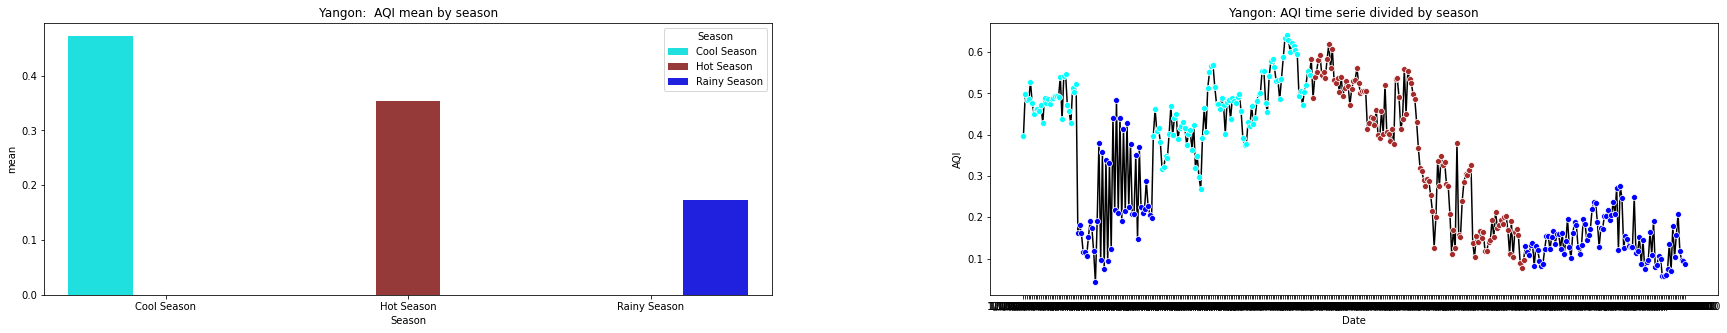

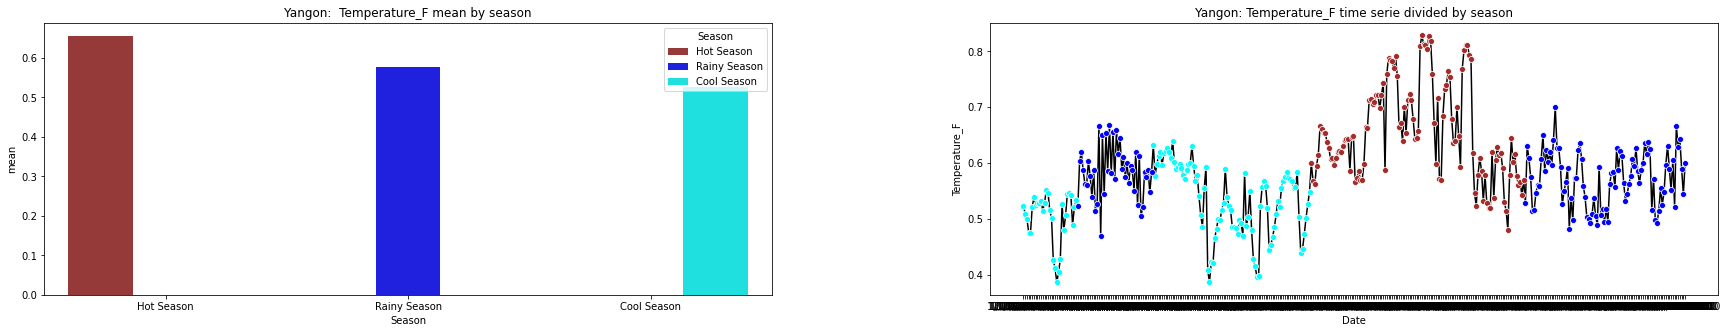

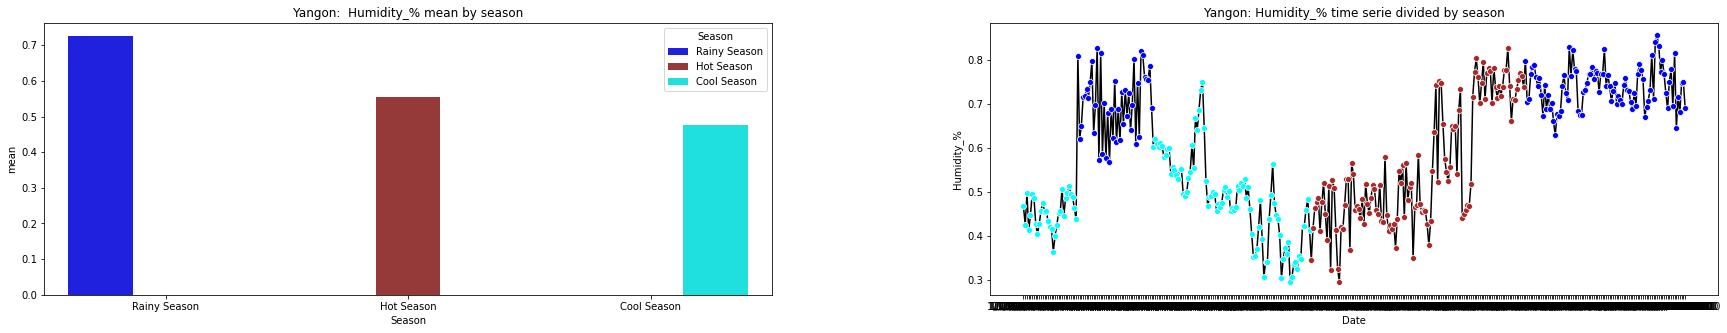

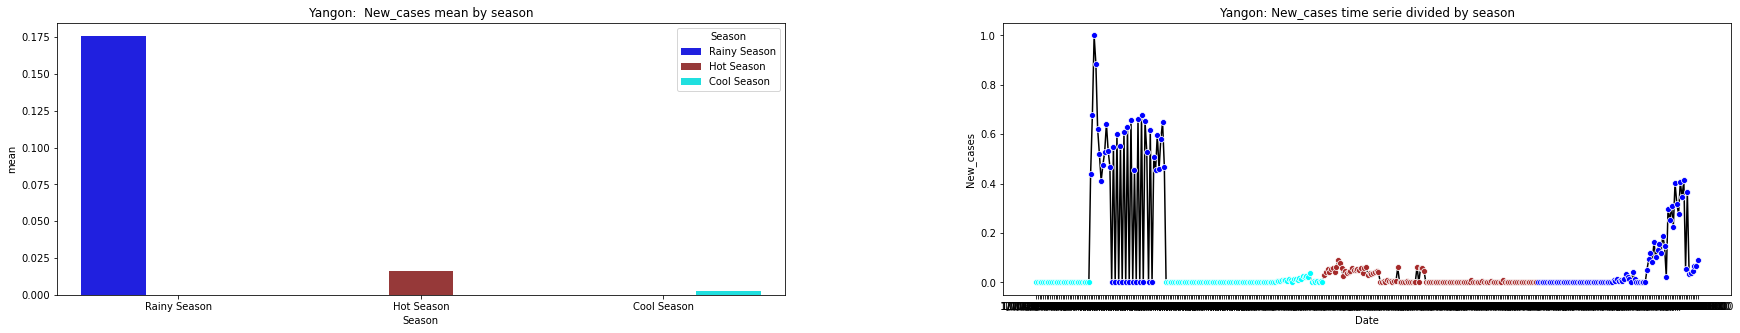

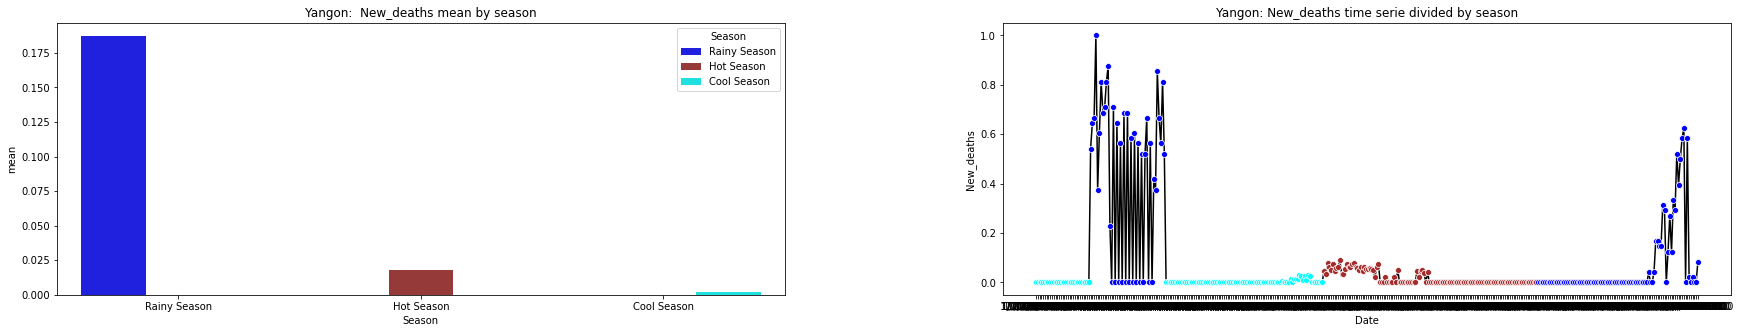

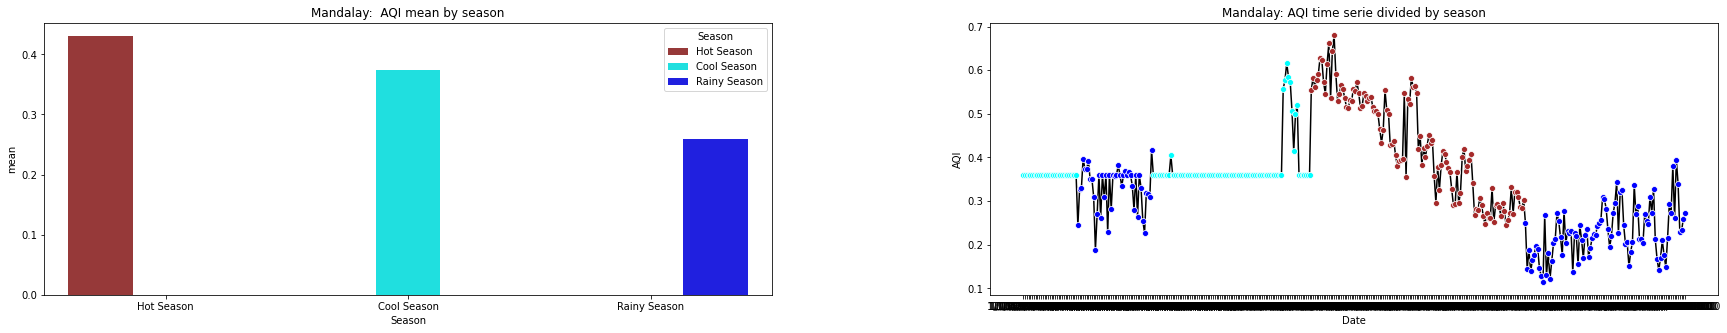

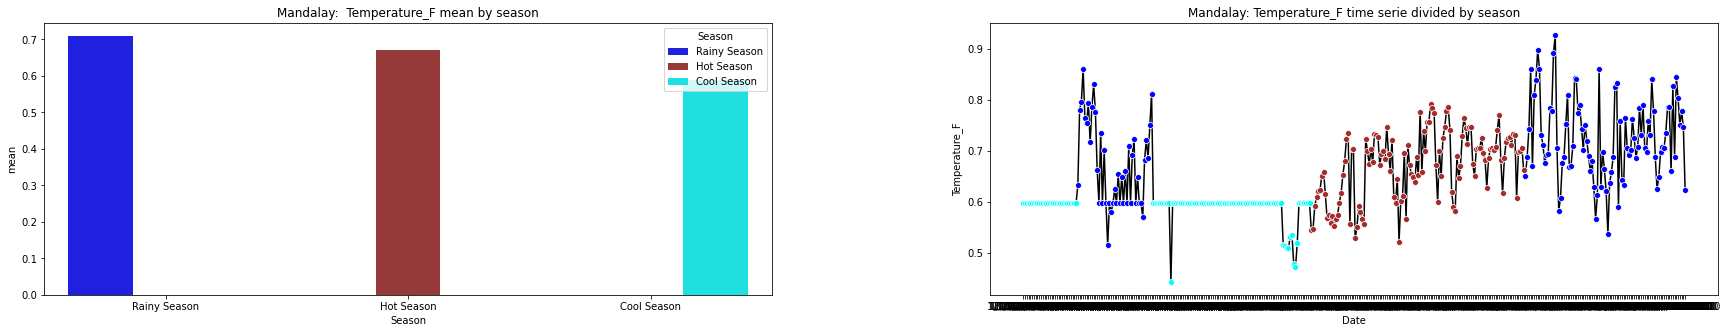

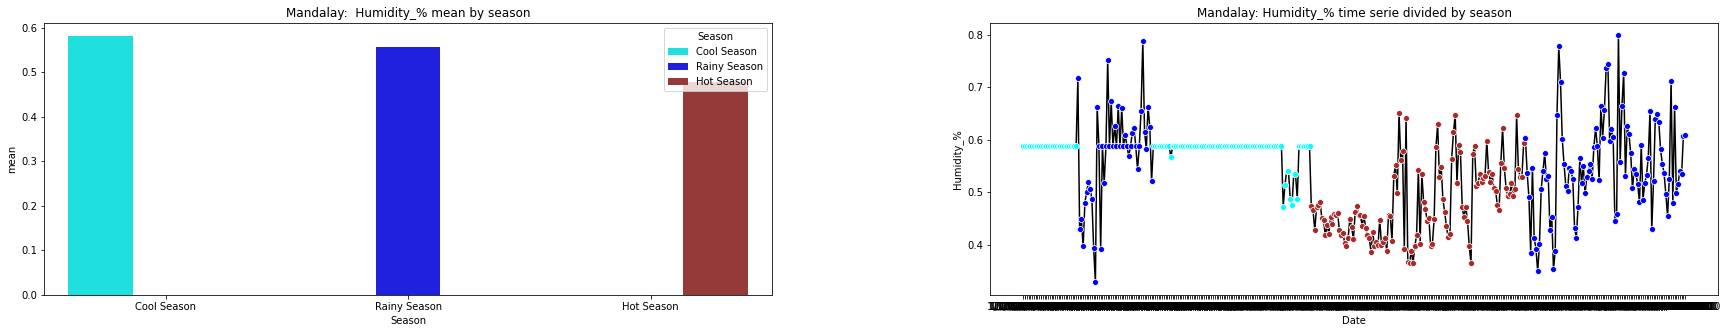

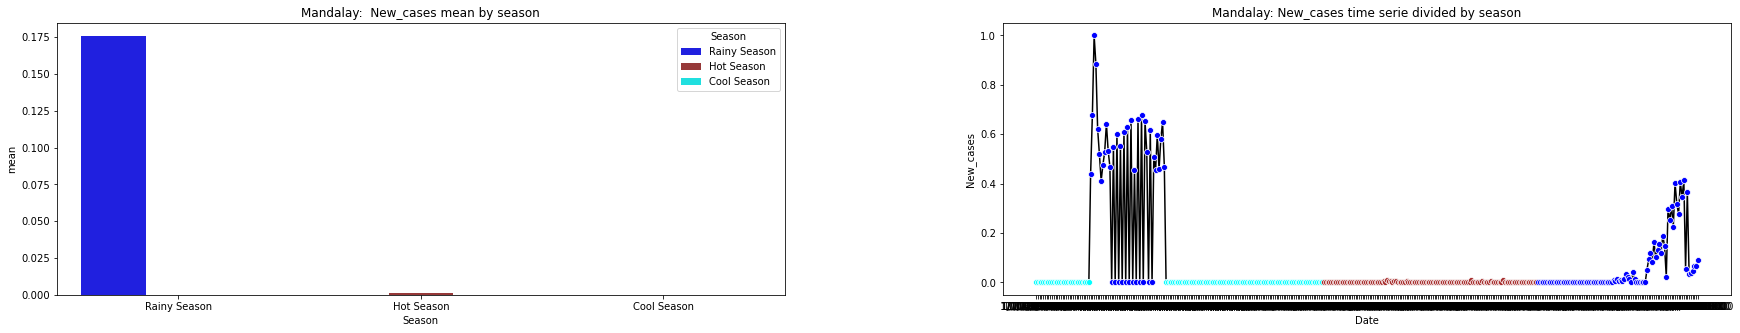

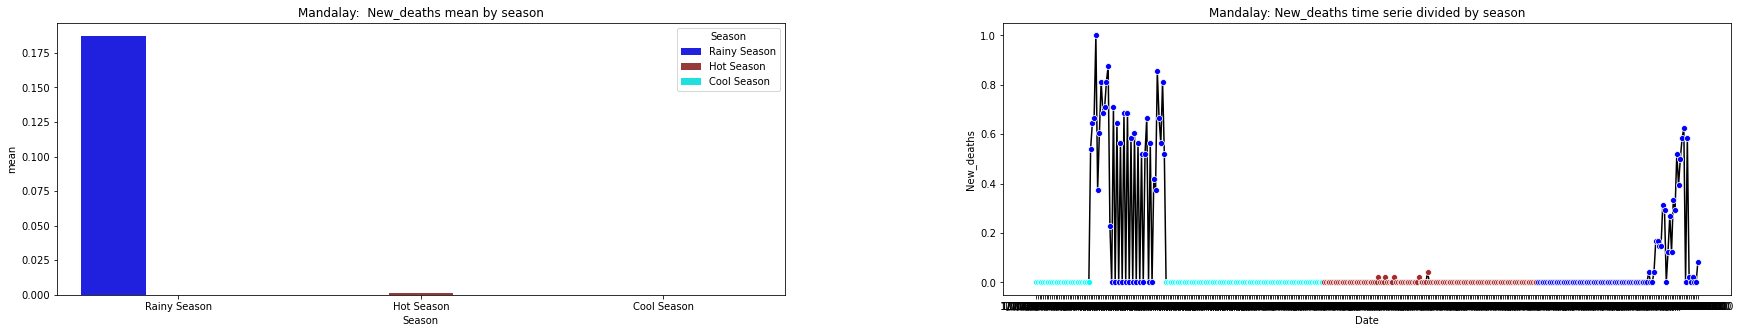

In [37]:
for i in range(len(cities)):
    plot_hist_ts_season(city_data[i], 'AQI', 'Season', colors_season_cols, cities[i] + ': ')
    plot_hist_ts_season(city_data[i], 'Temperature_F', 'Season', colors_season_cols, cities[i] + ': ')
    plot_hist_ts_season(city_data[i], 'Humidity_%', 'Season', colors_season_cols, cities[i] + ': ')
    plot_hist_ts_season(city_data[i], 'New_cases', 'Season', colors_season_cols, cities[i] + ': ')
    plot_hist_ts_season(city_data[i], 'New_deaths', 'Season', colors_season_cols, cities[i] + ': ')

### Hallazgos y respuesta a la pregunta:

Podemos observar que existe una clara tendencia a que existan nuevos casos de enfermos y muertos por afecciones respiratorias en las temporadas de lluvia, lo cual se vincula con resultados anteriores ya que la humedad y temperatura estaban correlacionadas positivamente con los nuevos casos de Yangon y Mandalay respectivamente. De este modo, se puede observar que estas variables medioambientales a su vez se encuentran influenciadas en gran medida por la temporada del año, ya que la humedad se aumenta con la lluvia y la temperatura es templada.

Como interpretación final, considero que una posible explicación al comportamiento de las variables radica en que debido a la pandemia del COVID-19 la métrica del AQI disminuyó notablemente, ya que en prácticamente todo el mundo se tomó la medida de confinamiento lo cual trajo consigo que no se usaran vehículos y consecuentemente se redujeran las emisiones de carbono. Si bien, en el último tramo de la serie de tiempo coincide el COVID-19 y la temporada de lluvia, la evidencia histórica nos dice que aun así esta temporada es un periodo en el que suelen crecer los casos de enfermos y muertos, algo que también se comprueba con los gráficos de barras por temporada a lado de cada serie de tiempo.